In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
from scipy.optimize import brentq
%matplotlib inline

import scipy.integrate as integrate
from scipy.stats import expon #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon
from scipy.stats import pareto #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html#scipy.stats.pareto
from scipy.stats import weibull_min #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html#scipy.stats.weibull_min

In [2]:
import src.Class_FiscRule as CFR

### Fiscal rule for a small open economy $\rho = 1/\beta$

In [3]:
theta_min = 1
theta_max = 3
omega = 0.98

# Environments
    # Low present bias
beta = 0.8
FR = CFR.FiscRule(omega = omega, beta = beta, rho = 1/beta, grid_min = theta_min, grid_max = theta_max, grid_size = 200, lambda_exp = 3, dist = 'exponential')
    # High present bias
beta_h = 0.5
FR_high = CFR.FiscRule(omega = omega, beta = beta_h, rho = 1/beta_h, grid_min = theta_min, grid_max = theta_max, lambda_exp = 3, dist = 'exponential')

In [4]:
print(FR.mean_deficit())

0.10704419177152968


In [5]:
# Allocations
    # Low present bias
discretionary = FR.discretionary_alloc()
state_contingent = FR.state_contingent_alloc()
discretionary_cap = FR.disc_cap_alloc(np.inf)

    # High present bias
discretionary_h = FR_high.discretionary_alloc()
state_contingent_h = FR_high.state_contingent_alloc()
tight_cap = FR_high.tight_cap_alloc()

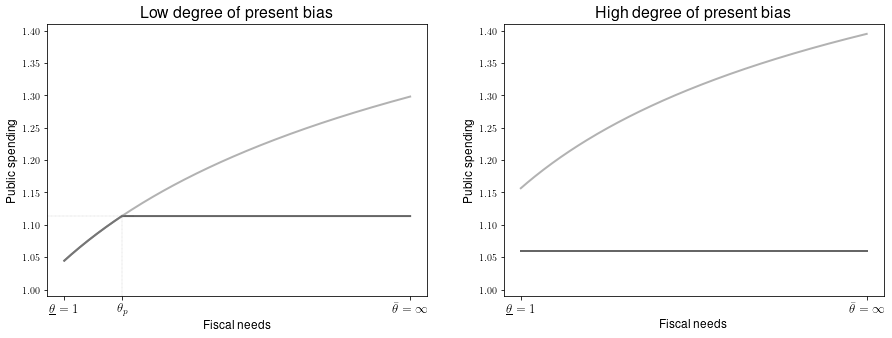

In [6]:
# Plot        
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15,5))

ax1.plot(FR.theta_grid, discretionary_cap, lw=2, alpha=0.6, color='k') #, label='discretion and cap')
ax1.plot(FR.theta_grid, discretionary, lw=2, alpha=0.6, linestyle='-', color='gray')#, label='discretionary'

ax2.plot(FR_high.theta_grid, tight_cap, lw=2, alpha=0.6, color='k')# label='tight cap')
ax2.plot(FR_high.theta_grid, discretionary_h, lw=2, alpha=0.6, linestyle='-', color='gray')

ax1.set_title('Low degree of present bias', fontsize=16)
ax2.set_title('High degree of present bias', fontsize=16)
ax1.set_xlabel('Fiscal needs', fontsize=12)
ax2.set_xlabel('Fiscal needs', fontsize=12)
ax1.set_ylabel('Public spending', fontsize=12)
ax2.set_ylabel('Public spending', fontsize=12)

ax1.set(xticks=[theta_min, FR.theta_p(FR.theta_bar), theta_max])#, yticks=[])
ax1.set_xticklabels([r'$\underline{\theta}=1$', '$\\theta_p$', r'$\bar{\theta}=\infty$'], fontsize=13)
ax2.set(xticks=[theta_min, theta_max])#, yticks=[])
ax2.set_xticklabels([r'$\underline{\theta}=1$', r'$\bar{\theta}=\infty$'], fontsize=13)

ymin=0.99
ymax=1.41
ax1.set_ylim([ymin,ymax])
ax2.set_ylim([ymin,ymax])

ax1.axvline(x=FR.theta_p(FR.theta_bar), ymax=0.3, lw=0.3, alpha=0.6, color='k', linestyle=':')
ax1.axhline(y=FR.discretionary(FR.theta_p(FR.theta_bar)), xmax=0.23, lw=0.3, alpha=0.6, color='k', linestyle=':')

#plt.savefig(save_results_to + 'Fig1_soe.pdf', dpi = 300)
plt.show()